In [15]:
import pandas as pd
import os
import numpy as np

PROJ_ROOT = os.path.join(os.pardir)

In [16]:
pd.options.display.max_columns = 130

In [17]:
clean_data_path = os.path.join(PROJ_ROOT, 
                         'data',
                         'processed',
                         'full_data_final.csv')
df = pd.read_csv(clean_data_path)

In [18]:
df.shape

(1314, 89)

In [19]:
original_data = df.copy()

In [20]:
df.head(1)

,census_tract,population,housing_units,group_qtr_flag,ct_grp_qtr,pct_grp_qtr,mf_ia_110,mf_ia_h110,mf_ia_120,mf_ia_vehicle,f_vehicle_access_flag,low_income,prop_in_pov,median_income,mf_a_110,mf_a_h110,mf_a_120,mf_a_h1,mf_a_1,f_v_access_add_flag,ct_a_h1,prop_a_h1,ct_ai_h1,prop_ai_h1,ct_a_kids_h1,prop_a_kids_h1,ct_a_sen_h1,prop_a_sen_h1,ct_a_wht_h1,prop_a_wht_h1,ct_a_black_h1,prop_a_black_h1,ct_a_asian_h1,prop_a_asian_h1,ct_a_islander_h1,prop_a_islander_h1,ct_a_native_h1,prop_a_native_h1,ct_a_mult_h1,prop_a_mult_h1,ct_a_his_h1,prop_a_his_h1,ct_va_h1,prop_va_h1,ct_snap_h1,prop_snap_h1,ct_i_pop,ct_kids,ct_seniors,ct_white,ct_black,ct_asian,ct_islander,ct_native,ct_multi,ct_hispanic,ct_housing_no_vehicle,ct_snap,ho_tooth_loss,ho_arthritis,ub_alcoholic,ho_cancer,prev_c_cancer_screen,prev_chol_screen,ho_kidney_disease,ho_pulmonary,ho_ht_disease,ho_asthma,prev_lack_insurance,ub_smoker,ho_diabetes,prev_blood_test,ho_blood_pressure,ho_choles_screened,prev_mamm_use,ho_mental_health,ub_no_activity,ub_obesity,prev_clinical_services_m,prev_clinical_services_f,ho_physical_health,ub_sleep,ho_stroke,prev_med_bpressure,prev_dr_visits,prev_checkups,state,mrfei,geometry
0,17031010100,4854,2302,0,218.0,4.49,0,1,0,1,1,1,35.8,62177.0,0,1,0,1,0,1,1085.0,22.36,259.0,5.33,137.0,2.83,91.0,1.87,633.0,13.05,318.0,6.54,51.0,1.05,0.0,0.0,3.0,0.06,81.0,1.66,116.0,2.4,277.0,12.03,109.0,4.73,2035.0,1058.0,277.0,1810.0,2437.0,150.0,1.0,33.0,423.0,616.0,1162.0,433.0,12.5,20.2,20.4,4.7,82.9,82.2,2.8,6.0,4.8,10.8,16.6,18.6,10.3,59.0,31.9,28.2,82.0,13.7,24.4,34.9,26.8,25.4,11.9,39.8,3.2,70.3,60.4,76.0,IL,7.692308,"[(-87.677199, 42.022942), (-87.670073, 42.0229..."


In [21]:
remove=['group_qtr_flag','mf_ia_110','mf_ia_h110','mf_ia_120','mf_ia_vehicle','mf_a_110','mf_a_h110',
        'mf_a_120','geometry','state']

In [22]:
df=df.drop(remove, axis=1)

In [23]:
df.head()

,census_tract,population,housing_units,ct_grp_qtr,pct_grp_qtr,f_vehicle_access_flag,low_income,prop_in_pov,median_income,mf_a_h1,mf_a_1,f_v_access_add_flag,ct_a_h1,prop_a_h1,ct_ai_h1,prop_ai_h1,ct_a_kids_h1,prop_a_kids_h1,ct_a_sen_h1,prop_a_sen_h1,ct_a_wht_h1,prop_a_wht_h1,ct_a_black_h1,prop_a_black_h1,ct_a_asian_h1,prop_a_asian_h1,ct_a_islander_h1,prop_a_islander_h1,ct_a_native_h1,prop_a_native_h1,ct_a_mult_h1,prop_a_mult_h1,ct_a_his_h1,prop_a_his_h1,ct_va_h1,prop_va_h1,ct_snap_h1,prop_snap_h1,ct_i_pop,ct_kids,ct_seniors,ct_white,ct_black,ct_asian,ct_islander,ct_native,ct_multi,ct_hispanic,ct_housing_no_vehicle,ct_snap,ho_tooth_loss,ho_arthritis,ub_alcoholic,ho_cancer,prev_c_cancer_screen,prev_chol_screen,ho_kidney_disease,ho_pulmonary,ho_ht_disease,ho_asthma,prev_lack_insurance,ub_smoker,ho_diabetes,prev_blood_test,ho_blood_pressure,ho_choles_screened,prev_mamm_use,ho_mental_health,ub_no_activity,ub_obesity,prev_clinical_services_m,prev_clinical_services_f,ho_physical_health,ub_sleep,ho_stroke,prev_med_bpressure,prev_dr_visits,prev_checkups,mrfei
0,17031010100,4854,2302,218.0,4.49,1,1,35.8,62177.0,1,0,1,1085.0,22.36,259.0,5.33,137.0,2.83,91.0,1.87,633.0,13.05,318.0,6.54,51.0,1.05,0.0,0.00,3.0,0.06,81.0,1.66,116.0,2.40,277.0,12.03,109.0,4.73,2035.0,1058.0,277.0,1810.0,2437.0,150.0,1.0,33.0,423.0,616.0,1162.0,433.0,12.5,20.2,20.4,4.7,82.9,82.2,2.8,6.0,4.8,10.8,16.6,18.6,10.3,59.0,31.9,28.2,82.0,13.7,24.4,34.9,26.8,25.4,11.9,39.8,3.2,70.3,60.4,76.0,7.692308
1,17031010201,6450,2463,163.0,2.53,0,1,36.8,47411.0,0,0,0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,3776.0,1704.0,314.0,2312.0,2350.0,299.0,6.0,48.0,1435.0,2049.0,751.0,851.0,16.6,19.7,20.6,4.2,79.9,79.6,3.0,6.9,5.2,11.0,24.4,22.7,11.1,53.3,30.2,27.8,80.2,15.7,29.6,36.4,24.2,22.9,14.0,41.2,3.3,67.5,52.7,73.4,NaN
2,17031010202,2818,1115,315.0,11.18,0,1,18.5,51719.0,0,0,0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,1476.0,623.0,309.0,1237.0,953.0,143.0,1.0,18.0,466.0,789.0,464.0,232.0,15.6,22.6,20.4,5.6,81.5,82.5,3.3,7.4,6.2,10.4,22.2,20.1,11.9,58.7,32.9,30.4,79.6,13.9,27.9,34.3,27.3,24.1,13.6,39.1,3.8,72.4,57.3,75.0,NaN
3,17031010300,6236,2826,791.0,12.68,1,1,16.1,66875.0,1,0,1,1920.0,30.79,678.0,10.87,212.0,3.41,292.0,4.69,1183.0,18.96,521.0,8.36,59.0,0.95,3.0,0.04,6.0,0.10,147.0,2.37,204.0,3.27,315.0,11.14,137.0,4.86,2117.0,951.0,884.0,3267.0,1722.0,346.0,16.0,21.0,864.0,1169.0,993.0,470.0,13.1,22.6,20.8,6.3,82.4,83.0,3.1,6.7,6.1,9.7,17.9,17.4,10.4,62.1,32.5,31.0,78.9,12.4,24.8,31.1,29.9,24.8,12.0,36.6,3.5,73.3,62.8,75.4,10.256410
4,17031010400,5042,2098,1349.0,26.76,0,1,19.1,59861.0,0,0,0,5.0,0.10,2.0,0.03,1.0,0.02,0.0,0.00,3.0,0.06,1.0,0.03,1.0,0.01,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,1.0,0.06,0.0,0.02,1322.0,419.0,263.0,3341.0,729.0,562.0,5.0,17.0,388.0,480.0,655.0,277.0,9.1,13.0,25.2,3.4,76.9,74.7,1.7,4.0,3.0,9.9,13.5,14.0,5.5,61.6,19.5,21.5,80.0,14.0,17.8,24.4,30.7,27.4,8.2,34.7,1.7,62.2,68.7,71.8,8.163265


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1314 entries, 0 to 1313
Data columns (total 79 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   census_tract              1314 non-null   int64  
 1   population                1314 non-null   int64  
 2   housing_units             1314 non-null   int64  
 3   ct_grp_qtr                1314 non-null   float64
 4   pct_grp_qtr               1314 non-null   float64
 5   f_vehicle_access_flag     1314 non-null   int64  
 6   low_income                1314 non-null   int64  
 7   prop_in_pov               1314 non-null   float64
 8   median_income             1314 non-null   float64
 9   mf_a_h1                   1314 non-null   int64  
 10  mf_a_1                    1314 non-null   int64  
 11  f_v_access_add_flag       1314 non-null   int64  
 12  ct_a_h1                   1314 non-null   float64
 13  prop_a_h1                 1314 non-null   float64
 14  ct_ai_h1

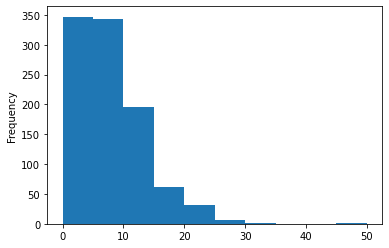

In [25]:
df.mrfei.plot(kind='hist')

In [26]:
df.mrfei.describe()

count    987.000000
mean       7.441640
std        5.835605
min        0.000000
25%        3.448276
50%        7.142857
75%       10.714286
max       50.000000
Name: mrfei, dtype: float64

In [33]:
df['eating_locations']=df.mrfei.apply(lambda x: 'No food' if pd.isna(x) else 'Food' )

In [42]:
idxs = df.iloc[:,:8].index
core_df=df.iloc[:,:8]

In [43]:
core_df

,census_tract,population,housing_units,ct_grp_qtr,pct_grp_qtr,f_vehicle_access_flag,low_income,prop_in_pov
0,17031010100,4854,2302,218.0,4.49,1,1,35.8
1,17031010201,6450,2463,163.0,2.53,0,1,36.8
2,17031010202,2818,1115,315.0,11.18,0,1,18.5
3,17031010300,6236,2826,791.0,12.68,1,1,16.1
4,17031010400,5042,2098,1349.0,26.76,0,1,19.1
...,...,...,...,...,...,...,...,...
1309,17031843500,11309,278,10273.0,90.84,0,1,34.3
1310,17031843600,2807,1169,0.0,0.00,0,1,22.5
1311,17031843700,2117,920,1.0,0.05,0,0,3.7
1312,17031843800,2110,651,0.0,0.00,1,1,23.0


In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

In [57]:
core_df.describe()

,census_tract,population,housing_units,ct_grp_qtr,pct_grp_qtr,f_vehicle_access_flag,low_income,prop_in_pov
count,1.314000e+03,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000
mean,1.703156e+10,3953.329528,1496.465753,68.707763,1.738508,0.200913,0.518265,17.140715
std,2.944146e+05,1788.800486,761.006299,352.577133,6.321919,0.400836,0.499857,12.932596
min,1.703101e+10,237.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.300000
25%,1.703125e+10,2548.000000,964.500000,0.000000,0.000000,0.000000,0.000000,6.925000
50%,1.703172e+10,3848.000000,1424.000000,2.000000,0.060000,0.000000,1.000000,13.500000
75%,1.703182e+10,5149.500000,1893.000000,30.750000,0.937500,0.000000,1.000000,24.300000
max,1.703184e+10,16735.000000,9751.000000,10273.000000,90.840000,1.000000,1.000000,77.100000


In [66]:
df.head(1)

,census_tract,population,housing_units,ct_grp_qtr,pct_grp_qtr,f_vehicle_access_flag,low_income,prop_in_pov,median_income,mf_a_h1,mf_a_1,f_v_access_add_flag,ct_a_h1,prop_a_h1,ct_ai_h1,prop_ai_h1,ct_a_kids_h1,prop_a_kids_h1,ct_a_sen_h1,prop_a_sen_h1,ct_a_wht_h1,prop_a_wht_h1,ct_a_black_h1,prop_a_black_h1,ct_a_asian_h1,prop_a_asian_h1,ct_a_islander_h1,prop_a_islander_h1,ct_a_native_h1,prop_a_native_h1,ct_a_mult_h1,prop_a_mult_h1,ct_a_his_h1,prop_a_his_h1,ct_va_h1,prop_va_h1,ct_snap_h1,prop_snap_h1,ct_i_pop,ct_kids,ct_seniors,ct_white,ct_black,ct_asian,ct_islander,ct_native,ct_multi,ct_hispanic,ct_housing_no_vehicle,ct_snap,ho_tooth_loss,ho_arthritis,ub_alcoholic,ho_cancer,prev_c_cancer_screen,prev_chol_screen,ho_kidney_disease,ho_pulmonary,ho_ht_disease,ho_asthma,prev_lack_insurance,ub_smoker,ho_diabetes,prev_blood_test,ho_blood_pressure,ho_choles_screened,prev_mamm_use,ho_mental_health,ub_no_activity,ub_obesity,prev_clinical_services_m,prev_clinical_services_f,ho_physical_health,ub_sleep,ho_stroke,prev_med_bpressure,prev_dr_visits,prev_checkups,mrfei,eating_locations
0,17031010100,4854,2302,218.0,4.49,1,1,35.8,62177.0,1,0,1,1085.0,22.36,259.0,5.33,137.0,2.83,91.0,1.87,633.0,13.05,318.0,6.54,51.0,1.05,0.0,0.0,3.0,0.06,81.0,1.66,116.0,2.4,277.0,12.03,109.0,4.73,2035.0,1058.0,277.0,1810.0,2437.0,150.0,1.0,33.0,423.0,616.0,1162.0,433.0,12.5,20.2,20.4,4.7,82.9,82.2,2.8,6.0,4.8,10.8,16.6,18.6,10.3,59.0,31.9,28.2,82.0,13.7,24.4,34.9,26.8,25.4,11.9,39.8,3.2,70.3,60.4,76.0,7.692308,Food


In [80]:
core_df.food_present.unique()

array(['Food', 'No food'], dtype=object)

population


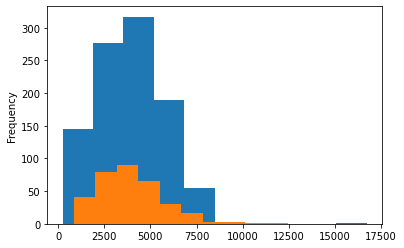

housing_units


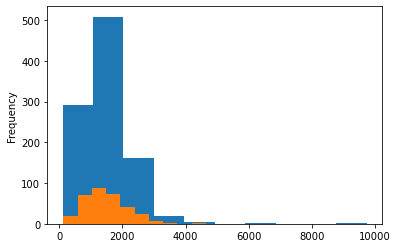

ct_grp_qtr


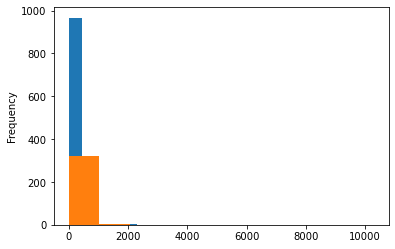

pct_grp_qtr


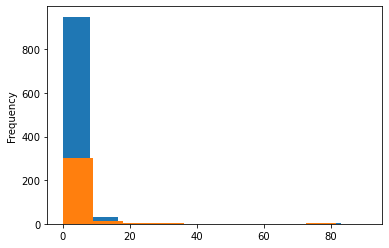

f_vehicle_access_flag


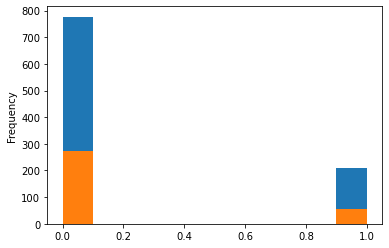

low_income


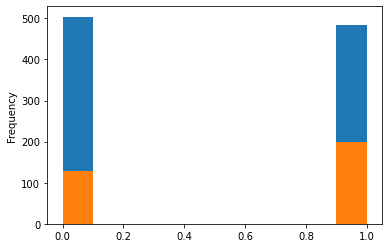

prop_in_pov


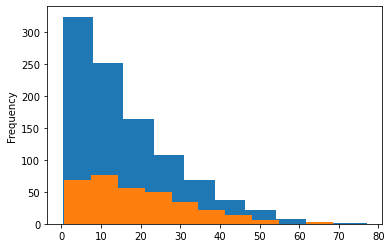

mrfei


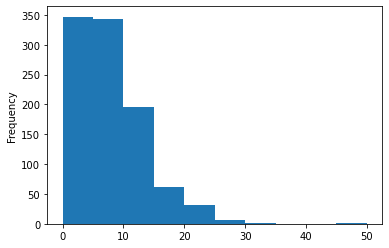

food_present


TypeError: no numeric data to plot

In [81]:
for col in core_df.columns[1:]:
    print(col)
    core_df[core_df.food_present=='Food'][col].plot(kind='hist')
    core_df[core_df.food_present=='No food'][col].plot(kind='hist')
    plt.show()

In [60]:
core_df['mrfei']=df.mrfei.iloc[idxs]

In [67]:
core_df['food_present']=df.eating_locations.iloc[idxs]

census_tract


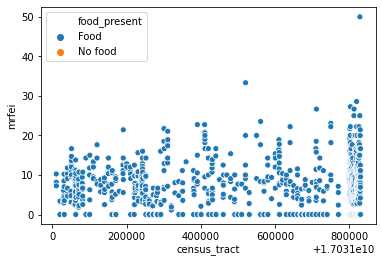

population


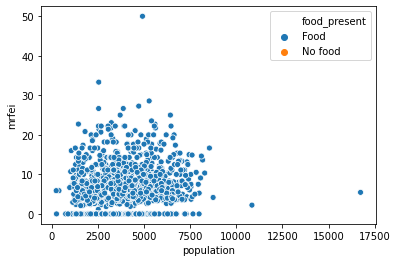

housing_units


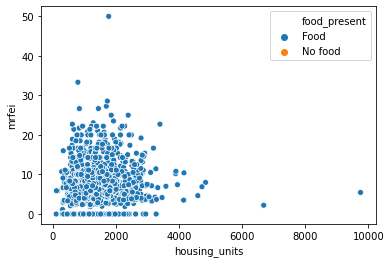

ct_grp_qtr


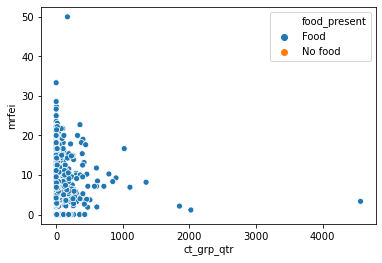

pct_grp_qtr


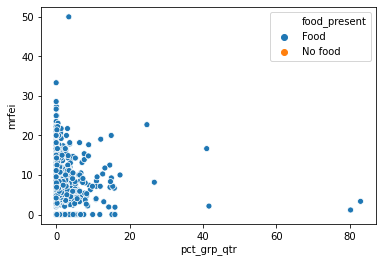

f_vehicle_access_flag


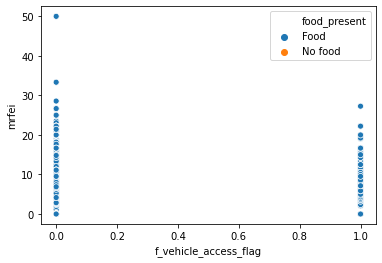

low_income


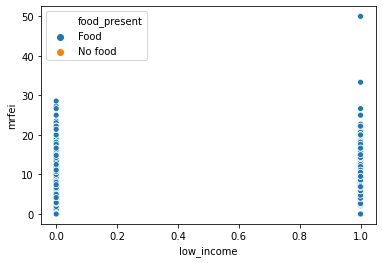

prop_in_pov


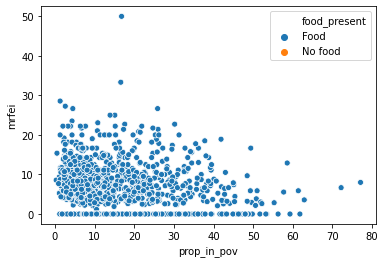

mrfei


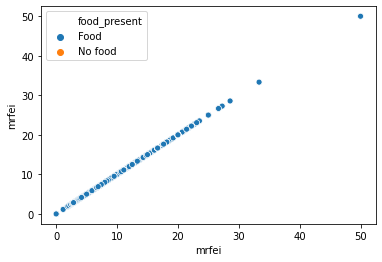

food_present


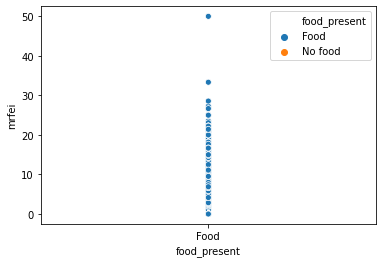

In [69]:
for col in core_df.columns:
    print(col)
    sns.scatterplot(data=core_df, x=col, y='mrfei', hue='food_present')
    plt.show()

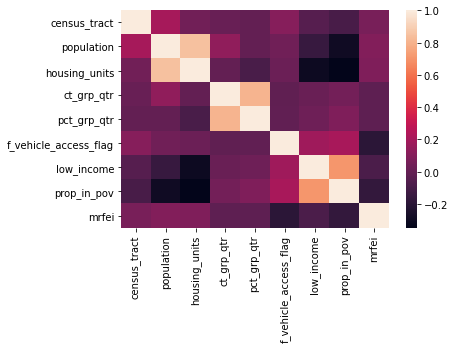

In [74]:
sns.heatmap(core_df.corr())